<a href="https://colab.research.google.com/github/Hassaan-642/Data-Science-Group-2---BWF---Hassaan-Ul-Haq/blob/main/Mini_Project_2_Models_Hassaan_Ul_Haq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mini Project 2**

Here is mini project 2. This time, pick a tough dataset related to a regression problem, clean it, perform EDA, apply transformations, conduct statistical tests (hypothesis, etc.), and prepare the data for ML models.
Models:
Baseline regressors (SVM, linear regression, Random Forest Regression, decision tree, gradient boosting, etc.)
An ANN, and display the error curve to identify if there is any overfitting or underfitting.
A model with some convolutional layers at the start (1D convolutional layer) followed by ANN layers; display the error curve and identify if there is any overfitting or underfitting.
Please note: try to provide as much information as possible from each plot or finding from any test performed.


importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import normaltest, shapiro, ttest_ind, f_oneway, levene
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
file_path = 'Housing.csv'
df = pd.read_csv(file_path)


Saving Housing.csv to Housing.csv


Inspect the data

In [ ]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeInd

 statistical summary and column names of dataset

In [ ]:
print("\nStatistical Summary of the Dataset:")
print(df.describe())
print("\nColumn Names:")
print(df.columns)


Statistical Summary of the Dataset:
              price          area   bedrooms  bathrooms    stories    parking
count  9.900000e+01     99.000000  99.000000  99.000000  99.000000  99.000000
mean   7.875348e+06   6936.939394   3.323232   1.767677   2.535354   1.222222
std    1.485293e+06   2127.022595   0.619880   0.603194   1.109450   0.827531
min    6.293000e+06   3500.000000   2.000000   1.000000   1.000000   0.000000
25%    6.667500e+06   6000.000000   3.000000   1.000000   2.000000   1.000000
50%    7.420000e+06   6500.000000   3.000000   2.000000   2.000000   1.000000
75%    8.557500e+06   7690.000000   4.000000   2.000000   4.000000   2.000000
max    1.330000e+07  16200.000000   5.000000   4.000000   4.000000   3.000000

Column Names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


Checking for missing values

In [ ]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


define features and target

In [ ]:
y = df['price']
X = df.drop('price', axis=1)


Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Cleaning

In [ ]:
df = pd.get_dummies(df, drop_first=True)#Convert categorical variables to numeric using one-hot encoding
print("\nData Types After Encoding:")
print(df.dtypes)
df = df.fillna(df.median())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()




Data Types After Encoding:
price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object

Number of Duplicate Rows: 0


Display cleaned data

In [ ]:
print("\nFirst Few Rows After Cleaning:")
print(df.head())


First Few Rows After Cleaning:
      price  area  bedrooms  bathrooms  stories  parking  guestroom_yes  \
0  13300000  7420         4          2        3        2          False   
1  12250000  8960         4          4        4        3          False   
2  12250000  9960         3          2        2        2          False   
3  12215000  7500         4          2        2        3          False   
4  11410000  7420         4          1        2        2           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  

Exploratory Data Analysis (EDA)

Correlation heatmap to see relationships between variables

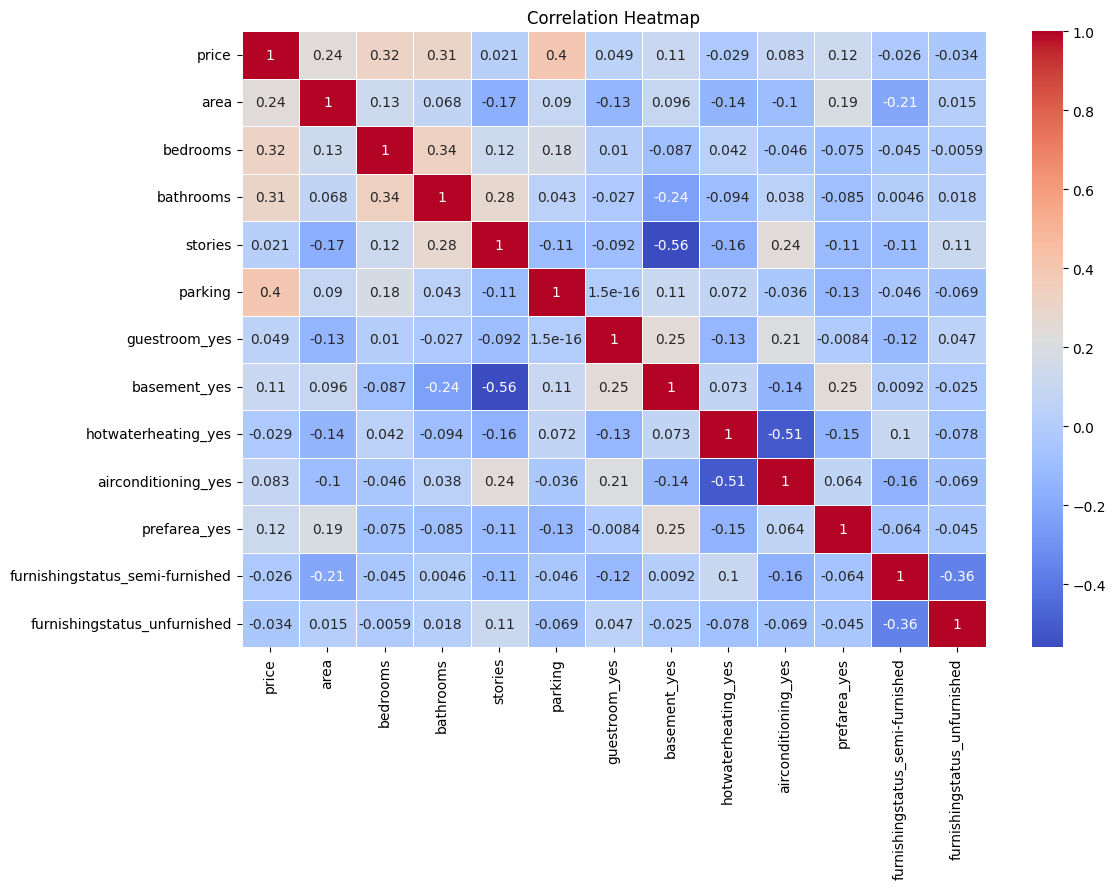

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



Pairplot to visualize relationships between features

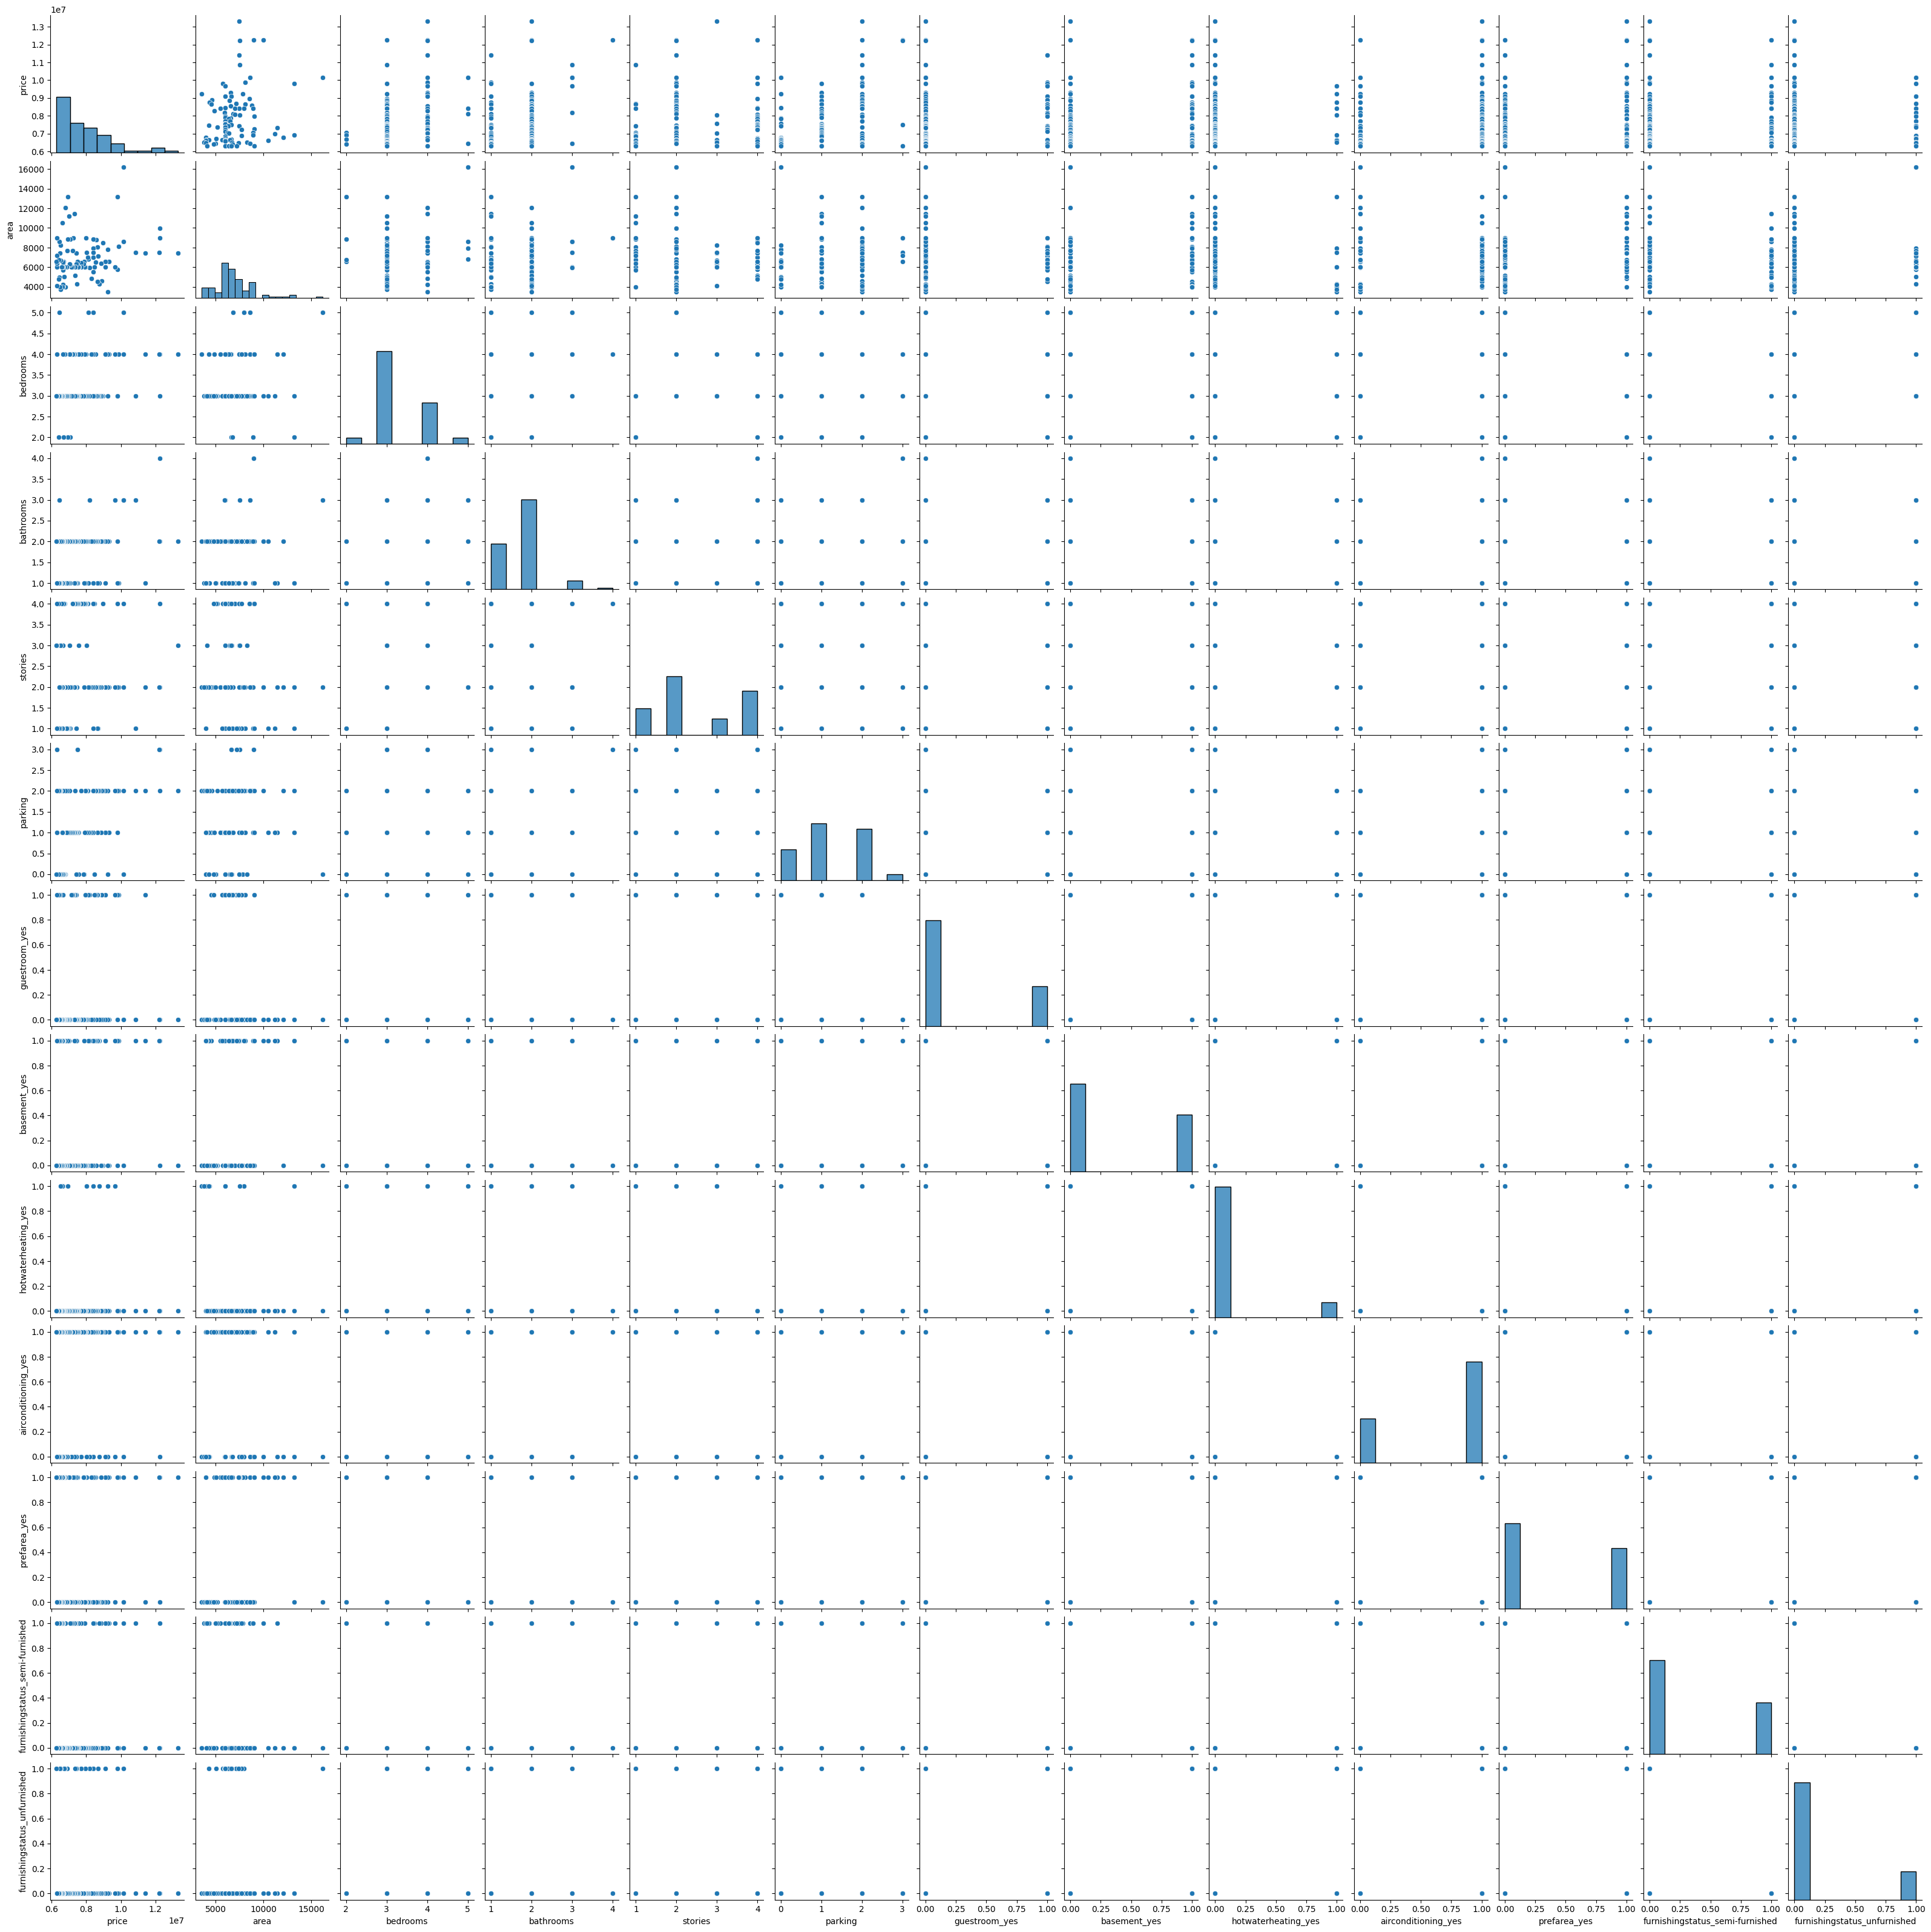

In [ ]:
sns.pairplot(df)
plt.show()

Box plots for potential outliers in numerical columns

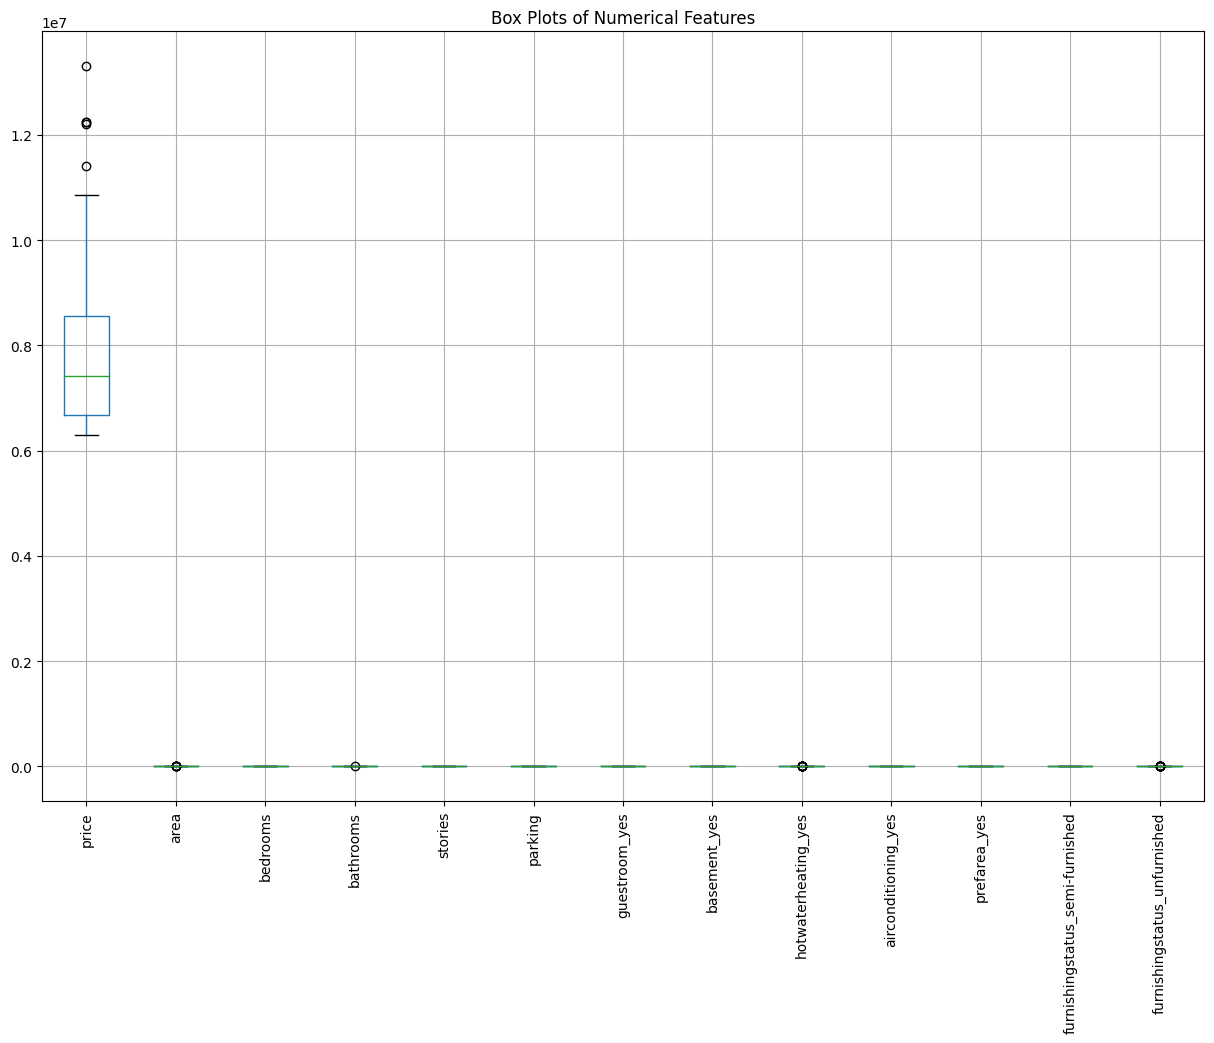

In [ ]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

Analyzing distributions of all features

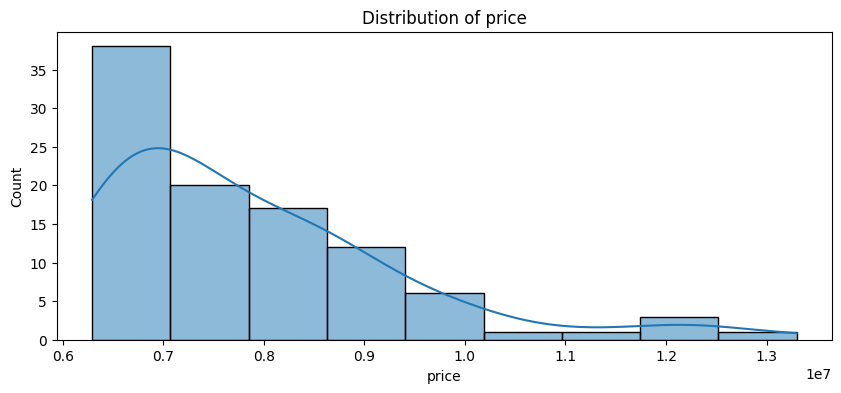

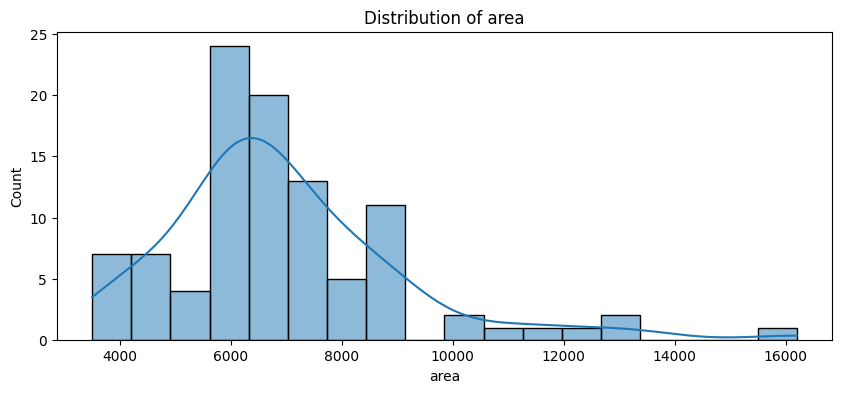

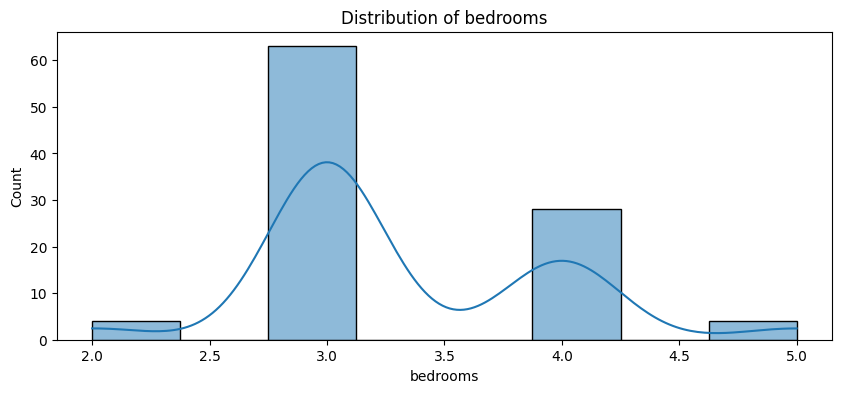

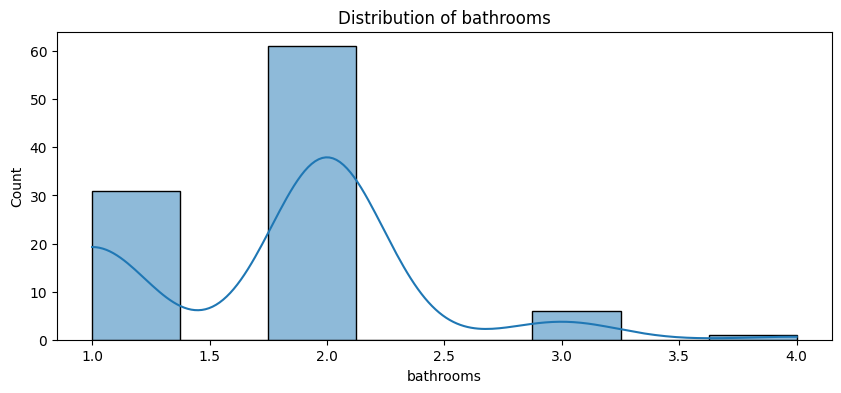

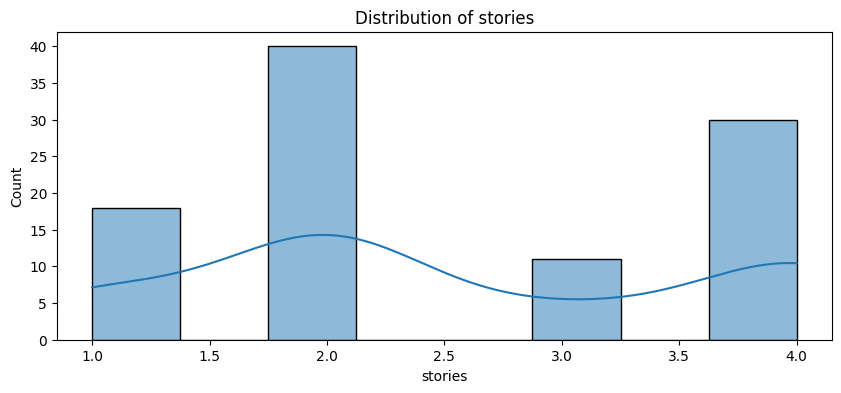

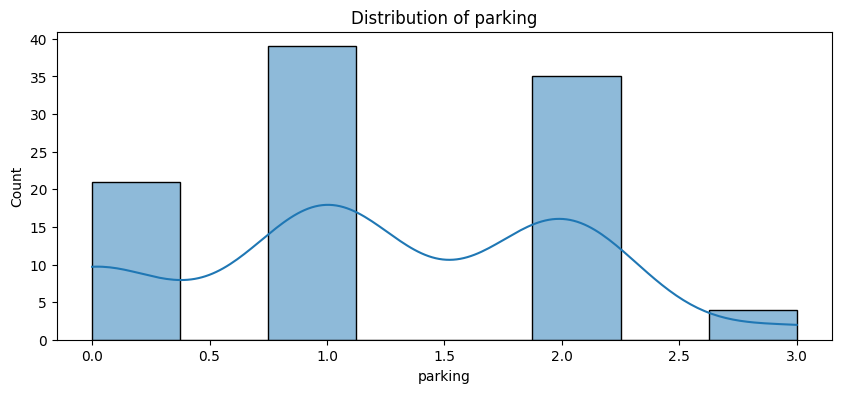

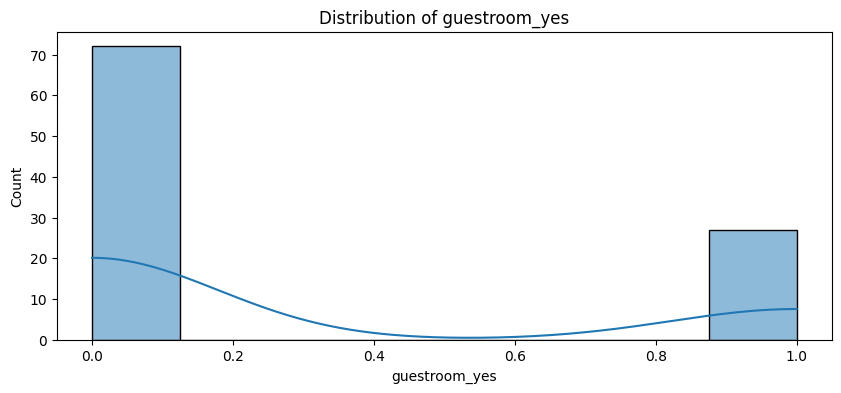

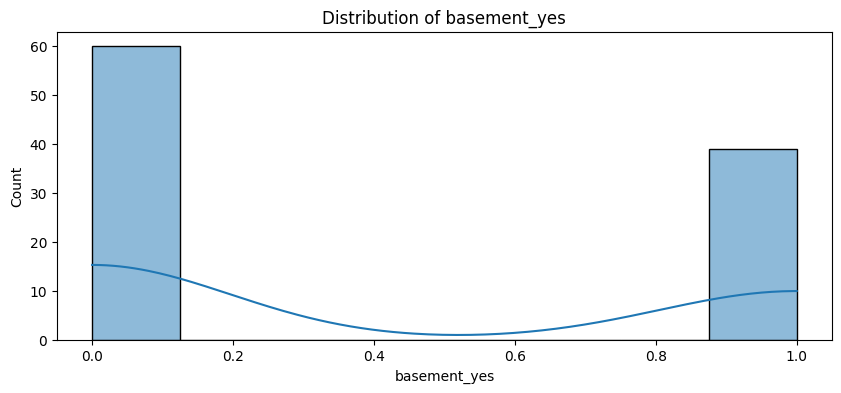

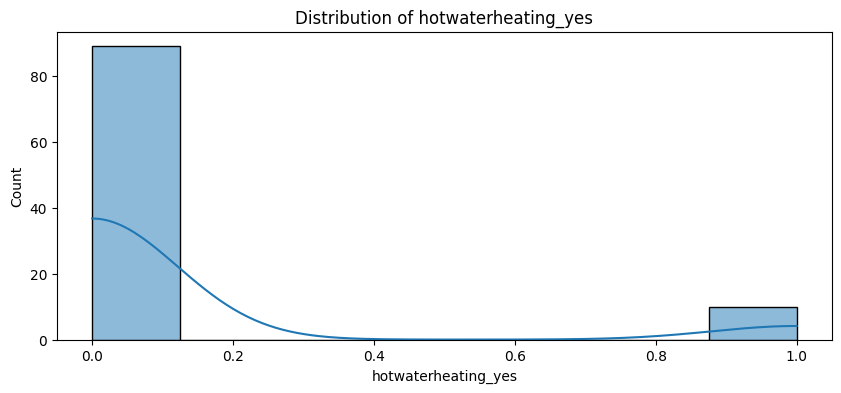

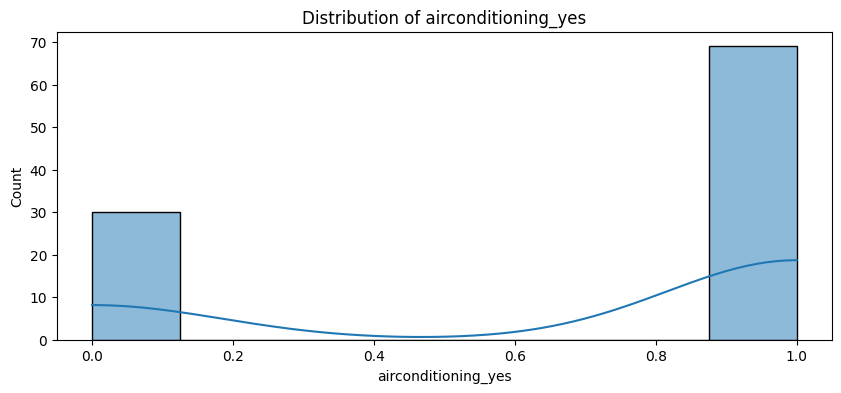

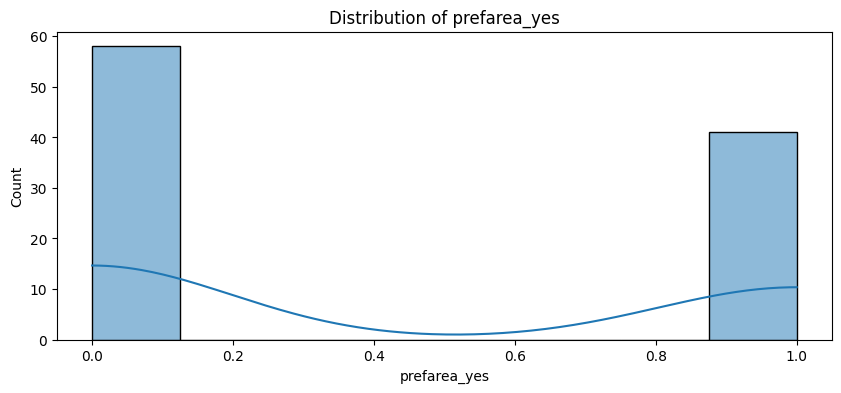

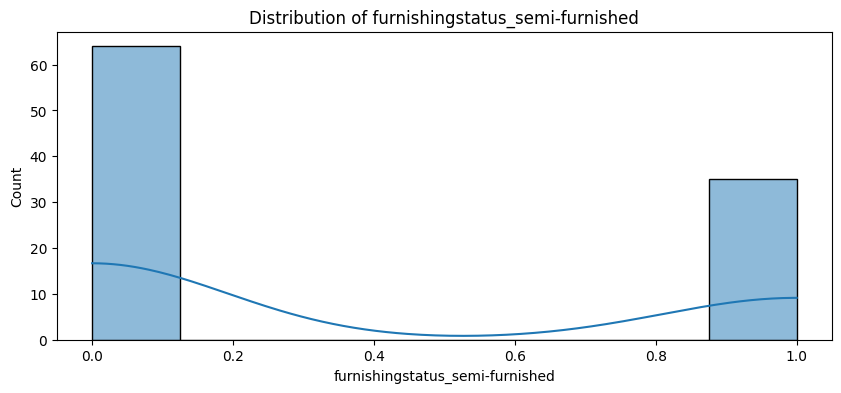

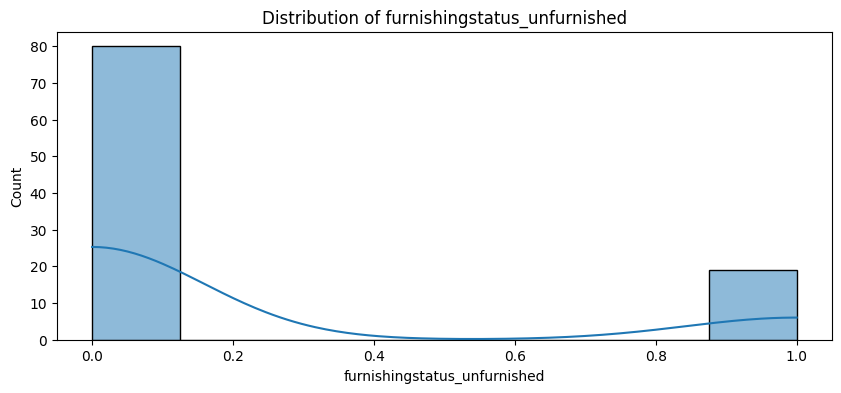

In [ ]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Visualizing relationships with the target variable using scatter plots

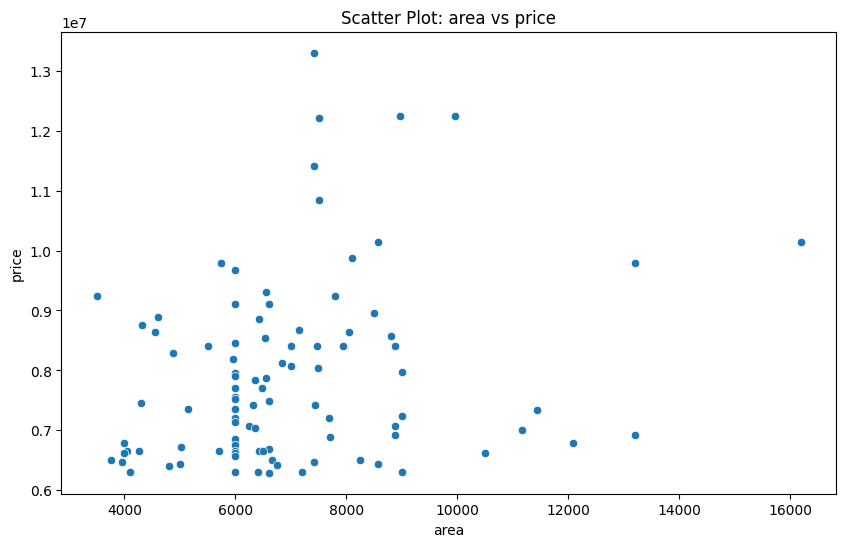

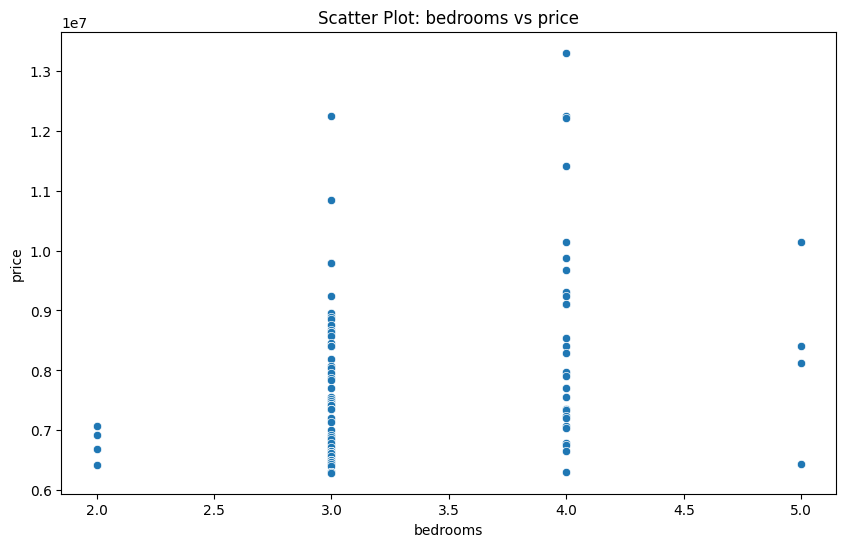

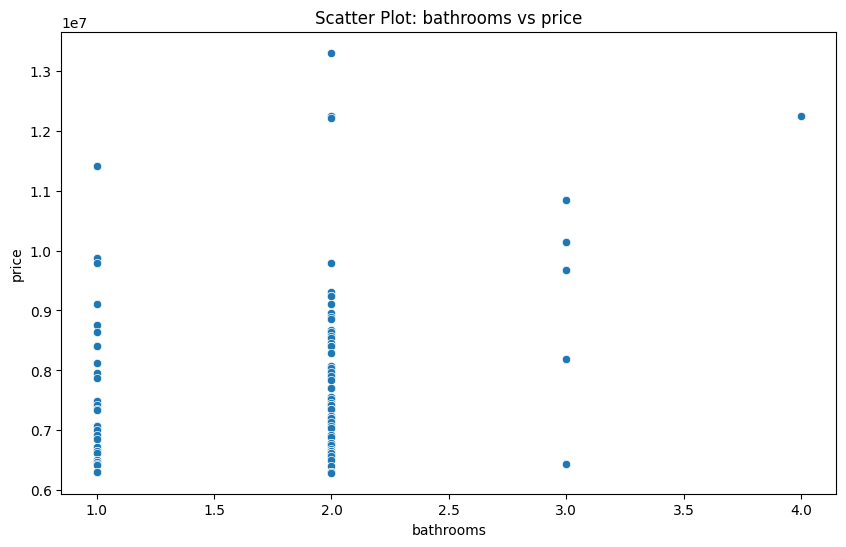

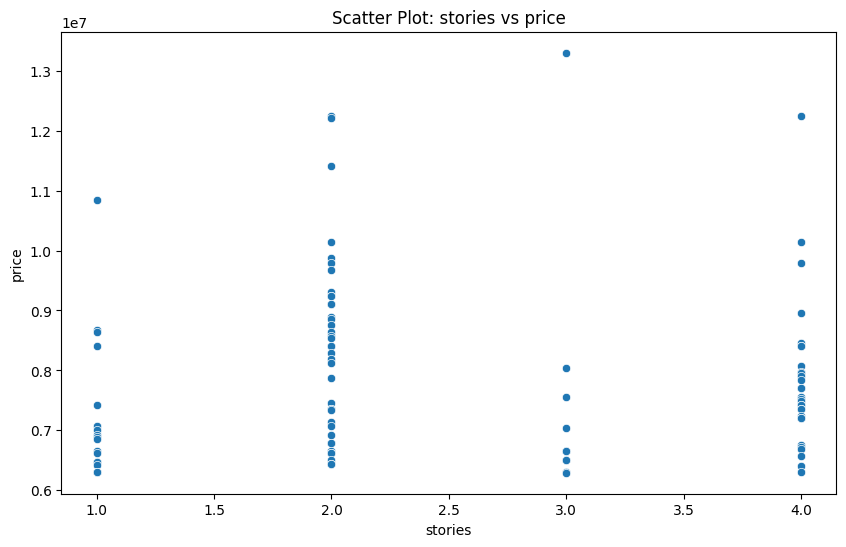

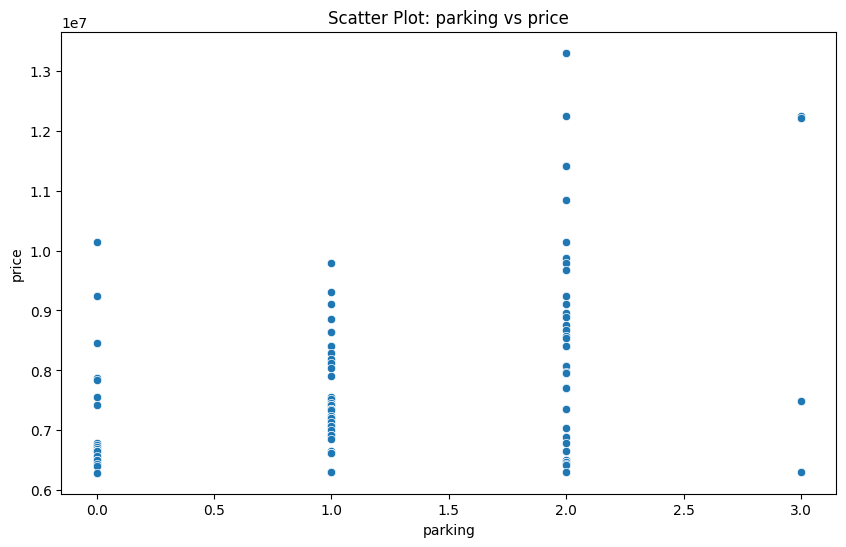

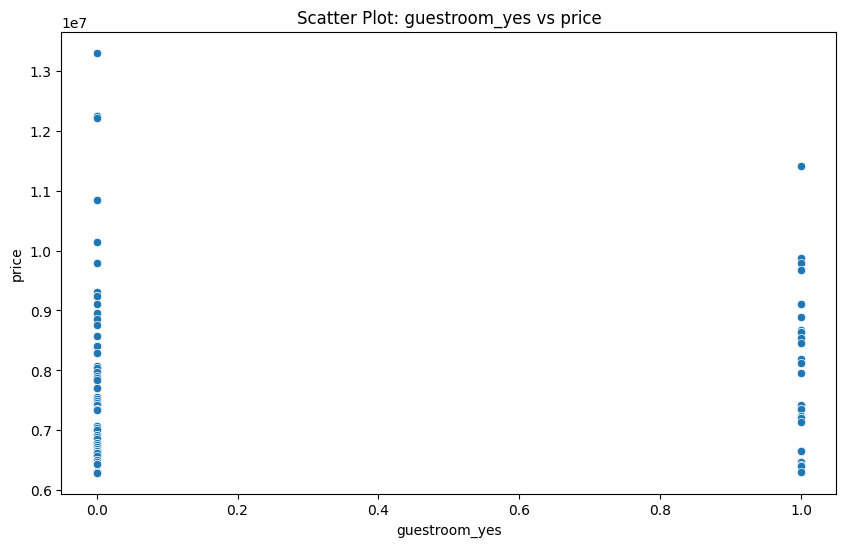

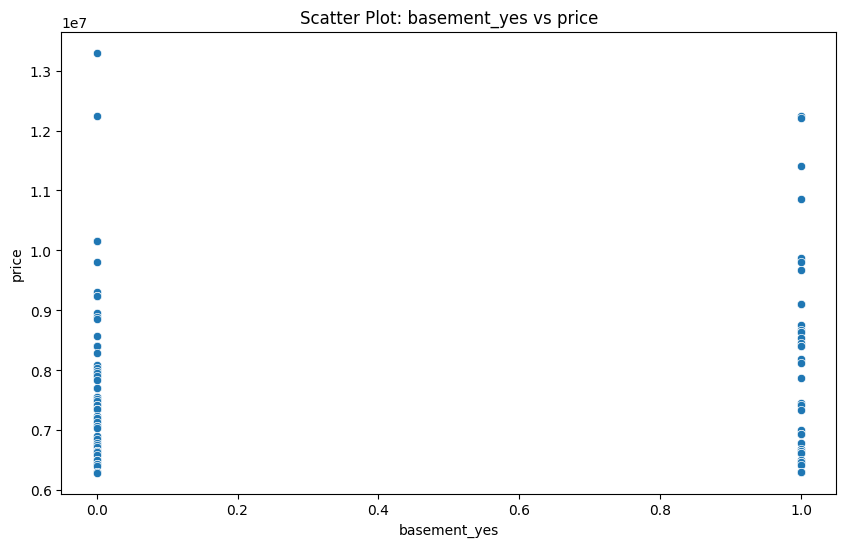

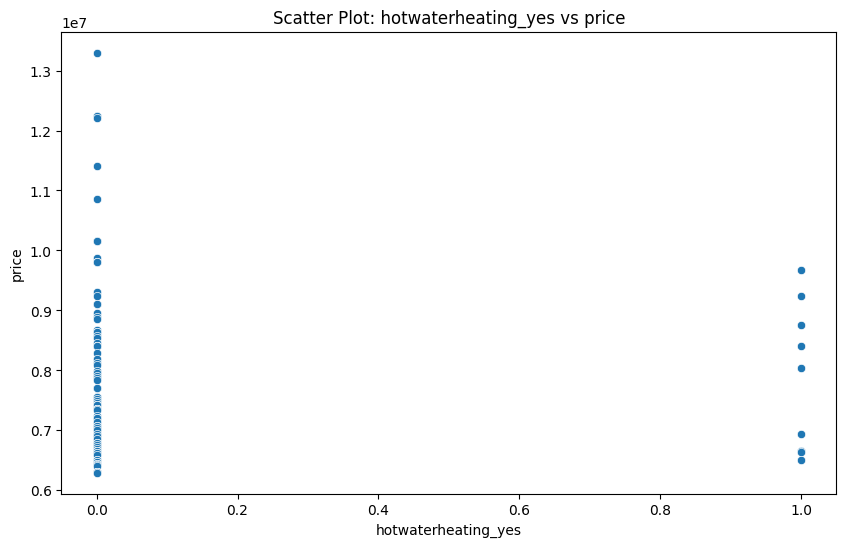

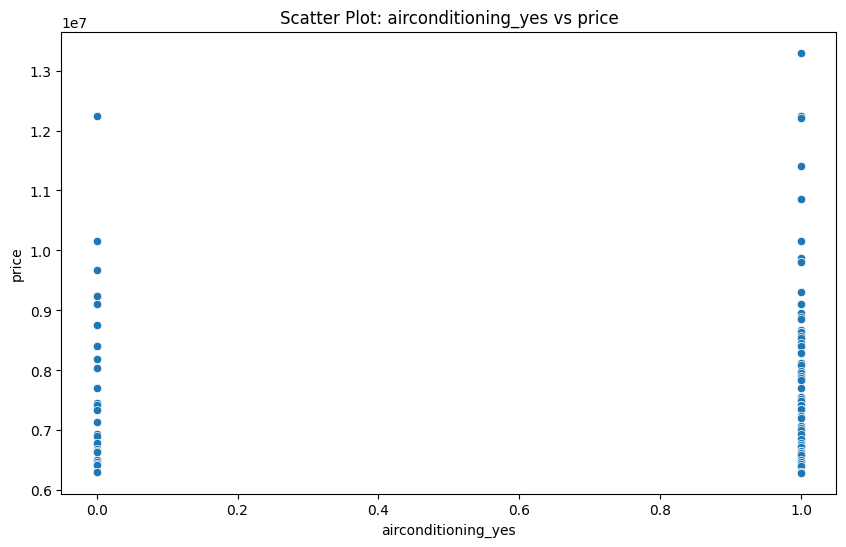

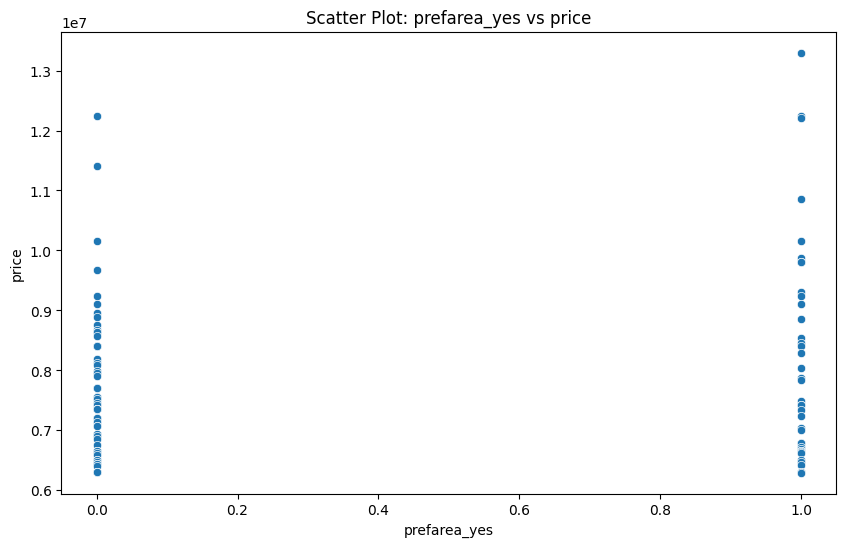

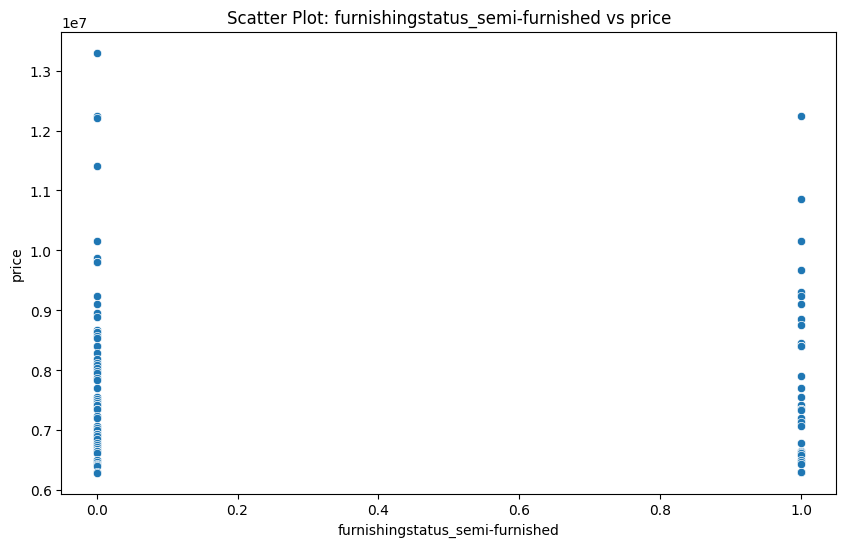

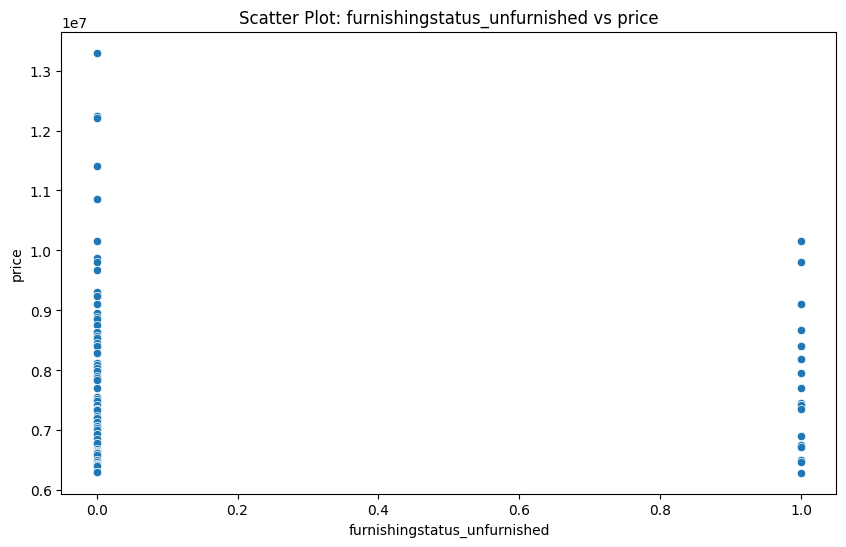

In [ ]:
for column in df.columns:
    if column != 'price':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title(f'Scatter Plot: {column} vs price')
        plt.show()

Statistical Tests

In [ ]:
# Normality test for the target variable
stat, p_value = shapiro(df['price'])
print('Shapiro-Wilk Test: p-value =', p_value)

if p_value < 0.05:
    print("The target variable is not normally distributed. Consider transforming it.")

# Variance test or Levene's test
levene_stat, levene_p = levene(df['area'], df['bedrooms'])
print(f"Levene's Test: p-value = {levene_p}")

# ANOVA test to compare means across different groups
anova_stat, anova_p = f_oneway(df['area'], df['bedrooms'])
print(f"ANOVA Test: p-value = {anova_p}")


Shapiro-Wilk Test: p-value = 2.712114642926445e-08
The target variable is not normally distributed. Consider transforming it.
Levene's Test: p-value = 1.9768413121276375e-16
ANOVA Test: p-value = 1.0102878853981413e-80


Data Transformation

In [ ]:
df['price_log'] = np.log1p(df['price'])#Log transformation
pt = PowerTransformer(method='yeo-johnson')#Power transformation
df['price_transformed'] = pt.fit_transform(df[['price']])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Verify transformations with visual checks

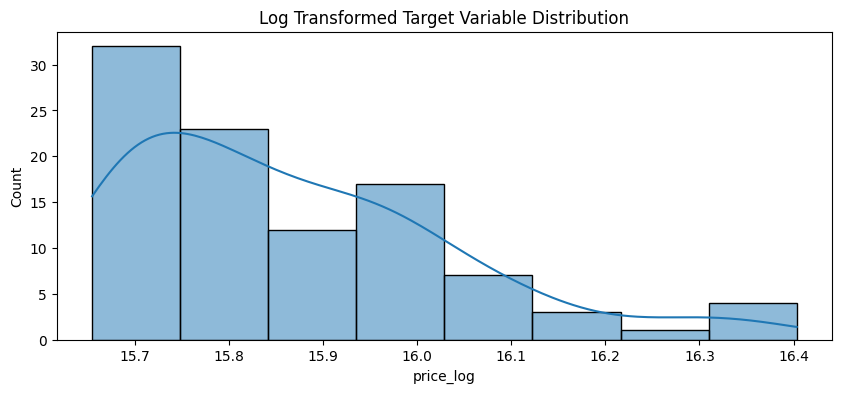

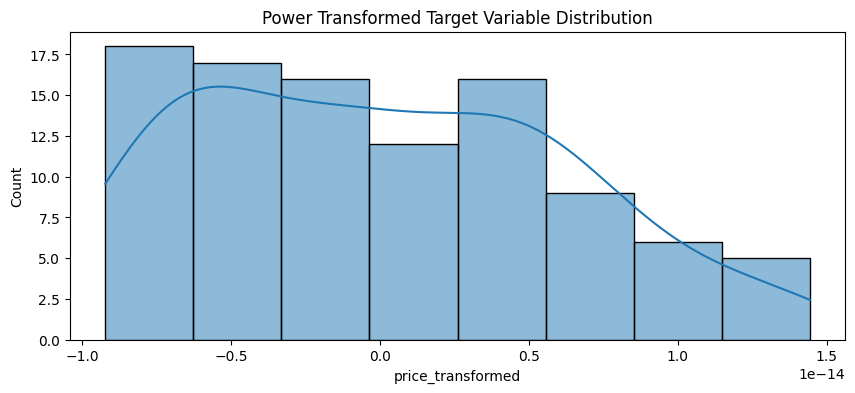

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price_log'], kde=True)
plt.title('Log Transformed Target Variable Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['price_transformed'], kde=True)
plt.title('Power Transformed Target Variable Distribution')
plt.show()

Data Preparation for Machine Learning Models

In [ ]:
X = df.drop(['price', 'price_log', 'price_transformed'], axis=1)
y = df['price_transformed']
selector = SelectKBest(score_func=f_regression, k=10)#Selecting top 10 features
X_new = selector.fit_transform(X, y)


Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print("\nSelected Features After Feature Selection:")
print(X.columns[selector.get_support()])


Selected Features After Feature Selection:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'guestroom_yes',
       'basement_yes', 'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished'],
      dtype='object')


Baseline Regressors with Hyperparameter Tuning

Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression: MSE(Mean Squared Error) ", lr_mse)
print("Linear Regression: R_Squared ", lr_r2)

Linear Regression: MSE(Mean Squared Error)  3.821772033564876e-29
Linear Regression: R_Squared  0.1809753436312489


Support Vector Regressor (SVR)

In [ ]:
svr_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train, y_train)
svr_predictions = svr_grid.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("Support Vector Regression: MSE(Mean Squared Error) ", svr_mse)
print("Support Vector Regression: R_Squared ", svr_r2)
print("Best Parameters for SVR: ", svr_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Support Vector Regression: MSE(Mean Squared Error)  4.837874390542516e-29
Support Vector Regression: R_Squared  -0.0367804189967007
Best Parameters for SVR:  {'C': 0.1, 'kernel': 'linear'}


Random Forest

In [ ]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_predictions = rf_grid.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest: MSE(Mean Squared Error) ", rf_mse)
print("Random Forest: R^2(R_Squared) ", rf_r2)
print("Best Parameters for Random Forest: ", rf_grid.best_params_)

Random Forest: MSE(Mean Squared Error)  4.709301891244079e-29
Random Forest: R^2(R_Squared)  -0.009226696238897159
Best Parameters for Random Forest:  {'max_depth': None, 'n_estimators': 100}


Decision Tree

In [ ]:
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_predictions = dt_grid.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree: MSE ", dt_mse)
print("Decision Tree: R_Squared ", dt_r2)
print("Best Parameters for Decision Tree: ", dt_grid.best_params_)

Decision Tree: MSE  4.7186907232535803e-29
Decision Tree: R_Squared  -0.01123876939311752
Best Parameters for Decision Tree:  {'max_depth': None}


Gradient Boosting

In [ ]:
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)
gb_predictions = gb_grid.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting: MSE ", gb_mse)
print("Gradient Boosting: R_Squared ", gb_r2)
print("Best Parameters for Gradient Boosting: ", gb_grid.best_params_)

Gradient Boosting: MSE  4.7186907232535803e-29
Gradient Boosting: R_Squared  -0.01123876939311752
Best Parameters for Gradient Boosting:  {'learning_rate': 0.01, 'n_estimators': 100}


Best Performance based on lowest MSE or highest R^2 Value


* All models have very similar and extremely low MSE values and almost all show negative R^2 values which indicates poor performance.

* Since all the R² values are negative except linear regression and are very close. So none of the models are performing well.

* Linear Regression have the positive R^2 value which are slightly better than the others.




Building and Analyzing ANN Model

In [ ]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [ ]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

Early stopping to avoid overfitting

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Train the model with validation split

In [ ]:
history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=[early_stopping])

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 62365.9219 - val_loss: 10.1908
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 57742.1289 - val_loss: 6.2554
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 79966.3594 - val_loss: 301.2984
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 79730.2969 - val_loss: 572.0970
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 54909.1055 - val_loss: 675.4263
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 38723.7539 - val_loss: 1131.2031
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 38187.8125 - val_loss: 1440.7418
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 42662.6445 - val_loss: 1533.1272
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 41312.8789 - val_loss: 1188.3855
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 29106.8398 - val_loss: 773.7446


Evaluate the model

In [ ]:
ann_predictions = ann_model.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)
print(f"ANN Model: MSE = {ann_mse}, R^2 = {ann_r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
ANN Model: MSE = 12.122176042697005, R^2 = -2.5978423047254432e+29


Plot training history

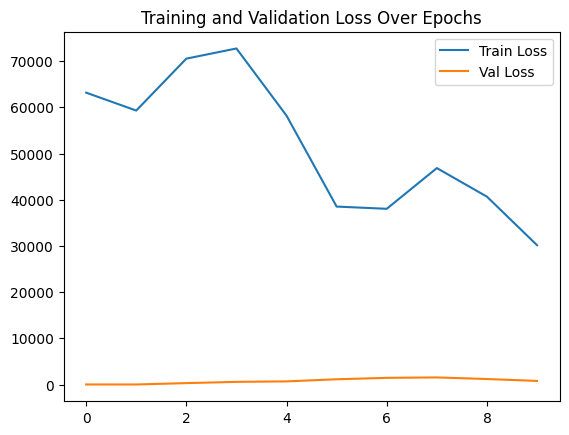

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

* This ANN model shows overfitting(i.e model is learning the training data too well, but it's not good at understanding new data).
* The training loss decreases significantly while the validation loss stays almost the same.
* This indicates that the model is learning the training data too well but failing to perform well on new data.  




1D Convolutional Neural Network (CNN) followed by ANN Layers

Reshaping the input data for 1D Convolution

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Define the CNN + ANN model

In [ ]:
cnn_ann_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [ ]:
cnn_ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Train the model

In [ ]:
history_cnn_ann = cnn_ann_model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 1679.5894 - mean_squared_error: 1679.5894 - val_loss: 821.6471 - val_mean_squared_error: 821.6471
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 545.7800 - mean_squared_error: 545.7800 - val_loss: 821.8330 - val_mean_squared_error: 821.8330
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 709.9934 - mean_squared_error: 709.9934 - val_loss: 15.0924 - val_mean_squared_error: 15.0924
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 122.8933 - mean_squared_error: 122.8933 - val_loss: 353.4810 - val_mean_squared_error: 353.4810
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 230.2961 - mean_squared_error: 230.2961 - val_loss: 88.0413 - val_mean_squared_error: 88.0413
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 153.6345 - mean_squared_error: 153.6345 - val_loss: 110.3123 - val_mean_squared_error: 110.3123
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.0294 - mean_squa

Plot the error curves

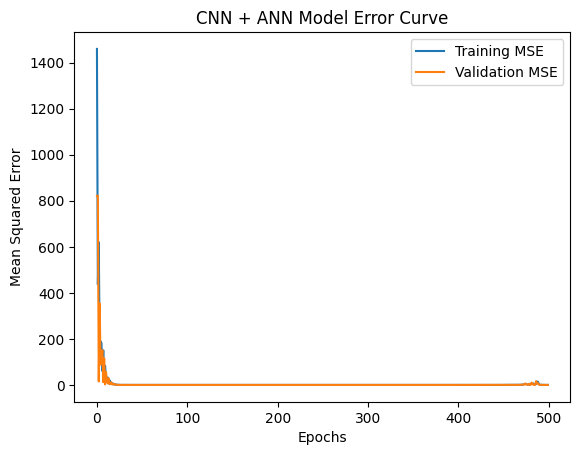

In [ ]:
plt.plot(history_cnn_ann.history['mean_squared_error'], label='Training MSE')
plt.plot(history_cnn_ann.history['val_mean_squared_error'], label='Validation MSE')
plt.title('CNN + ANN Model Error Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

* Both the training MSE and validation MSE decreases rapidly initially.
* This indicates that the model is learning quickly and effectively from
the training data.
* After the initial drop both curves flatten out and remain relatively stable.
* This suggests that the model has reached a point where it is no longer improving significantly.




